In [ ]:
!pip install wandb
!pip install swig
!pip install gym[all]
!pip install pygame

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.8/266.8 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 36.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 90.7 MB/s eta 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import gym
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-18-19ac1bb1bf91>:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  log_prob = action_dist.log_prob(torch.tensor(action))


Episode 1, Total Reward: -70.68441245273007 Total Steps:81
Episode 2, Total Reward: -391.5577659972471 Total Steps:88
Episode 3, Total Reward: -548.427097633072 Total Steps:105
Episode 4, Total Reward: -294.9149249183315 Total Steps:103
Episode 5, Total Reward: -8.982452215458636 Total Steps:88
Episode 6, Total Reward: -267.82841155197406 Total Steps:98
Episode 7, Total Reward: -243.8786836600334 Total Steps:118
Episode 8, Total Reward: -362.5507810325758 Total Steps:136
Episode 9, Total Reward: -391.31018263415245 Total Steps:113
Episode 10, Total Reward: -195.50413481603846 Total Steps:159
Episode 11, Total Reward: -275.99023928173006 Total Steps:141
Episode 12, Total Reward: -714.7829510101292 Total Steps:208
Episode 13, Total Reward: -92.65155077663285 Total Steps:151
Episode 14, Total Reward: -521.0946205835922 Total Steps:126
Episode 15, Total Reward: -240.77730470071486 Total Steps:189
Episode 16, Total Reward: -251.11283517931162 Total Steps:153
Episode 17, Total Reward: -173.5

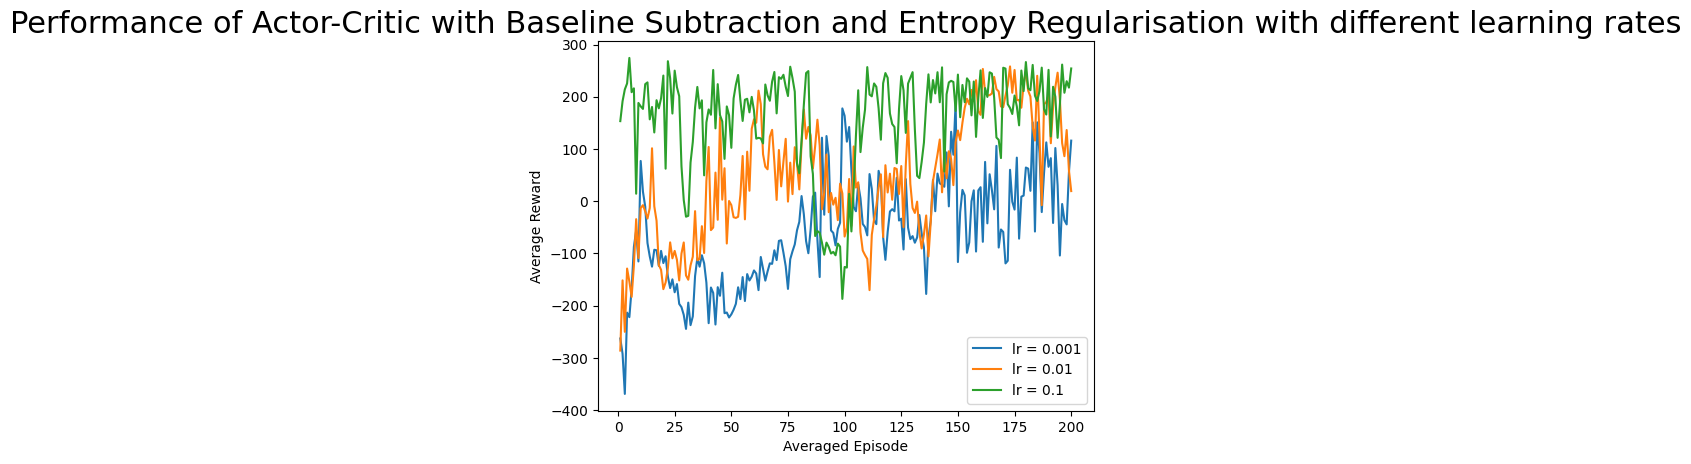

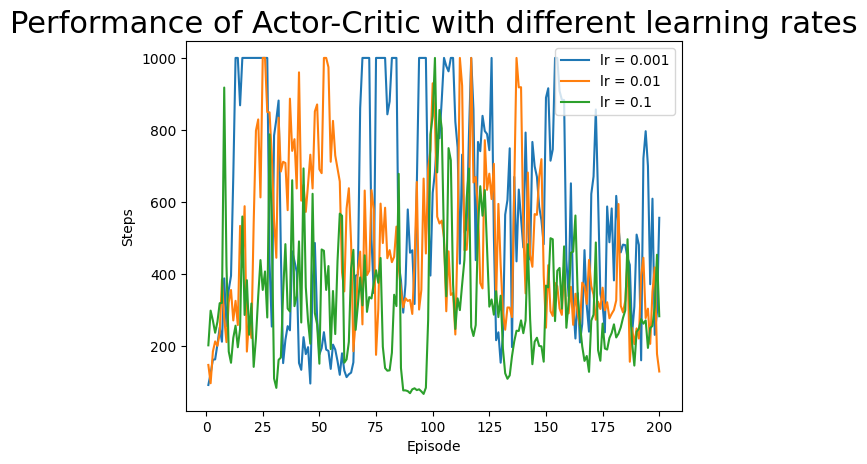

In [18]:


# Actor Network
class Actor(nn.Module):
    def __init__(self, input_size=8, output_size=4, hidden_size=128):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, state):
        x = self.relu(self.fc1(state))
        x = self.fc2(x)
        return x

# Critic Network
class Critic(nn.Module):
    def __init__(self, input_size=8, hidden_size=128):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()

    def forward(self, state):
        x = self.relu(self.fc1(state))
        x = self.fc2(x)
        return x

# Actor-Critic Model
class ActorCritic(nn.Module):
    def __init__(self, actor, critic, lr, entropy_weight=0.01):
        super(ActorCritic, self).__init__()
        self.actor = actor
        self.critic = critic
        self.actor_optimizer = optim.Adam(actor.parameters(), lr=0.001)
        self.critic_optimizer = optim.Adam(critic.parameters(), lr=0.001)
        self.entropy_weight = entropy_weight

    def forward(self, state):
        action_probs = torch.softmax(self.actor(state), dim=-1)
        state_value = self.critic(state)
        return action_probs, state_value



# Training loop
def update(agent, state, action, reward, next_state, done, gamma=0.99, entropy_weight=0.01):
    state = torch.tensor(state, dtype=torch.float32)
    next_state = torch.tensor(next_state, dtype=torch.float32)
    #print("ceheck 3")
    action = torch.tensor(action, dtype=torch.int64)
    #done = torch.tensor(done, dtype=torch.float)
    action_probs, state_val = agent(state)
    #reward = torch.tensor(reward, dtype=torch.float32)
    #done
    #actions = torch.tensor(action, dtype=torch.int64).view(-1, 1)
    #rewards = torch.tensor(rewards, dtype=torch.float32).view(-1, 1)
    #next_states = torch.tensor(next_states, dtype=torch.float32)
    #dones = torch.tensor(dones, dtype=torch.float32).view(-1, 1)

    action_dist = torch.distributions.Categorical(action_probs)
    #print("ceheck 4")
    log_prob = action_dist.log_prob(torch.tensor(action))
    #print("ceheck 5")

    # Compute TD targets
    with torch.no_grad():
        #print("ceheck 6")
        td_target = reward + (1 - done) * gamma * agent.critic(next_state)

    #print("td_target: {}".format(td_target))
    #print("ceheck 7")
    td_error = td_target - agent.critic(state)

    # Update critic loss
    #print("ceheck 8")
    critic_loss = td_error.pow(2).mean()
    agent.critic_optimizer.zero_grad()
    critic_loss.backward()
    agent.critic_optimizer.step()

    # Update actor
    entropy = action_dist.entropy().mean()
    actor_loss = -(log_prob * td_error.detach()) + agent.entropy_weight * entropy
    agent.actor_optimizer.zero_grad()
    actor_loss.backward()
    agent.actor_optimizer.step()

def smoothing(array):
  averages = []
  for i in range(0, len(array), 5):
      chunk = array[i:i+5]
      avg = sum(chunk) / len(chunk)
      averages.append(avg)
  return averages

def run(agent, env, n_episodes):
  epi_reward = []
  steps = []
  for i_episode in range(n_episodes):
    total_steps = 0
    state = env.reset()
    done = False
    total_reward = 0
    while not done:
        total_steps += 1
        action_probs, _ = agent(torch.tensor(state, dtype=torch.float32).unsqueeze(0))
        #print("action_probs: {}".format(action_probs))
        action = torch.multinomial(action_probs, num_samples=1).item()
        next_state, reward, done, _ = env.step(action)
        #print("ceheck 1")
        total_reward += reward
        #print("ceheck 2")
        update(agent, state, action, reward, next_state, done)
        state = next_state

    print(f"Episode {i_episode + 1}, Total Reward: {total_reward} Total Steps:{total_steps}")
    steps.append(total_steps)
    epi_reward.append(total_reward)
  env.close()
  return epi_reward, steps

def main():
  # Create Lunar Lander environment
  env = gym.make('LunarLander-v2')
  state_size = env.observation_space.shape[0]
  action_size = env.action_space.n
  n_episodes = 1000

  # Create actor, critic, and agent
  actor1 = Actor(state_size, action_size)
  critic1 = Critic(state_size)
  agent1 = ActorCritic(actor1, critic1, 0.001)
  e_array = [i for i in range(1, 201)]

  r_array1, s_array1 = run(agent1, env, n_episodes)



  r1 = smoothing(r_array1)
  s1 = smoothing(s_array1)

  # Define optimizer for actor and critic

  actor2 = Actor()
  critic2 = Critic()
  agent2 = ActorCritic(actor2, critic2, 0.01)

  r_array2, s_array2 = run(agent2, env, n_episodes)

  r2 = smoothing(r_array2)
  s2 = smoothing(s_array2)



  actor3 = Actor()
  critic3 = Critic()
  agent3 = ActorCritic(actor3, critic3, 0.1)

  r_array3, s_array3 = run(agent2, env, n_episodes)

  r3 = smoothing(r_array3)
  s3 = smoothing(s_array3)


  plt.title("Performance of Actor-Critic with Baseline Subtraction and Entropy Regularisation with different learning rates",fontsize=22)
  plt.plot(e_array, r1, label = "lr = 0.001")
  plt.plot(e_array, r2, label = "lr = 0.01")
  plt.plot(e_array, r3, label = "lr = 0.1")
  plt.xlabel('Averaged Episode')
  plt.ylabel('Average Reward')
  plt.legend()
  plt.show()

  plt.title("Performance of Actor-Critic with different learning rates",fontsize=22)
  plt.plot(e_array, s1, label = "lr = 0.001")
  plt.plot(e_array, s2, label = "lr = 0.01")
  plt.plot(e_array, s3, label = "lr = 0.1")
  plt.xlabel('Episode')
  plt.ylabel('Steps')
  plt.legend()
  plt.show()



main()

